In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
import pandas as pd

In [33]:
df_raw = pd.read_csv('/content/drive/MyDrive/data/sdp2022/task1_train_dataset.csv')

In [35]:
df_raw.head(5)

,index,title,first_author,description,core_id,doi,pub_year,theme
0,0,Activation of nitrofurazone by azoreductases: ...,M Nakanishi,NaN,190682983,10.1038/srep00063,2011,"Allied Health Professions, Dentistry, Nursing ..."
1,1,Organisation and delivery of home care re-able...,Allen,NaN,403149987,10.1111/j.1365-2524.2011.01010.x,2011,Social Work and Social Policy
2,2,Relationships between anthocyanins and other c...,Aurélie Bechoff,NaN,247875062,10.1016/j.foodchem.2013.09.132,2013,"Agriculture, Veterinary and Food Science"
3,3,New Insights into the Mechanisms of Water-Stre...,H. Cochard,NaN,253594132,10.1104/pp.109.138305,2009,Earth Systems and Environmental Sciences
4,4,Extensive chordate and annelid macrosynteny re...,"Hui, Jerome H.L.",Genes with the homeobox motif are crucial in d...,15139448,10.1093/molbev/msr175,2012,Biological Sciences


In [36]:
df_raw['description'].fillna("")

0                                                         
1                                                         
2                                                         
3                                                         
4        Genes with the homeobox motif are crucial in d...
                               ...                        
51555                                                     
51556                                                     
51557                                                     
51558    In a non-equilibrium system, a Constant Flux R...
51559                                                     
Name: description, Length: 51560, dtype: object

In [40]:
df_raw['text']=df_raw['title'] + '. ' + df_raw['description'].fillna("")

In [41]:
df_short = df_raw[['text','theme']]

In [42]:
df_short.columns = ['text','category']

In [43]:
df_short.head(5)

,text,category
0,Activation of nitrofurazone by azoreductases: ...,"Allied Health Professions, Dentistry, Nursing ..."
1,Organisation and delivery of home care re-able...,Social Work and Social Policy
2,Relationships between anthocyanins and other c...,"Agriculture, Veterinary and Food Science"
3,New Insights into the Mechanisms of Water-Stre...,Earth Systems and Environmental Sciences
4,Extensive chordate and annelid macrosynteny re...,Biological Sciences


In [44]:
from collections import Counter
Counter(df_short.category)

Counter({'Aeronautical, Mechanical, Chemical and Manufacturing Engineering': 1243,
         'Agriculture, Veterinary and Food Science': 1352,
         'Allied Health Professions, Dentistry, Nursing and Pharmacy': 3602,
         'Anthropology and Development Studies': 457,
         'Architecture, Built Environment and Planning': 896,
         'Area Studies': 269,
         'Art and Design: History, Practice and Theory': 412,
         'Biological Sciences': 3026,
         'Business and Management Studies': 3906,
         'Chemistry': 1597,
         'Civil and Construction Engineering': 472,
         'Classics': 63,
         'Clinical Medicine': 4903,
         'Communication, Cultural and Media Studies, Library and Information Management': 584,
         'Computer Science and Informatics': 2513,
         'Earth Systems and Environmental Sciences': 1808,
         'Economics and Econometrics': 857,
         'Education': 1307,
         'Electrical and Electronic Engineering, Metallurgy and Mat

In [45]:
df = df_short

In [46]:
df.head()

,text,category
0,Activation of nitrofurazone by azoreductases: ...,"Allied Health Professions, Dentistry, Nursing ..."
1,Organisation and delivery of home care re-able...,Social Work and Social Policy
2,Relationships between anthocyanins and other c...,"Agriculture, Veterinary and Food Science"
3,New Insights into the Mechanisms of Water-Stre...,Earth Systems and Environmental Sciences
4,Extensive chordate and annelid macrosynteny re...,Biological Sciences


In [47]:
df['category'] = df.category.map({'Aeronautical, Mechanical, Chemical and Manufacturing Engineering':0,'Agriculture, Veterinary and Food Science':1,'Allied Health Professions, Dentistry, Nursing and Pharmacy':2,'Anthropology and Development Studies':3,'Architecture, Built Environment and Planning':4, 'Area Studies': 5,'Art and Design: History, Practice and Theory':6, 'Biological Sciences':7,'Business and Management Studies':8, 'Chemistry':9, 'Civil and Construction Engineering':10,'Classics':11,'Clinical Medicine': 12, 'Communication, Cultural and Media Studies, Library and Information Management': 13, 'Computer Science and Informatics': 14, 'Earth Systems and Environmental Sciences': 15, 'Economics and Econometrics': 16, 'Education': 17, 'Electrical and Electronic Engineering, Metallurgy and Materials': 18, 'English Language and Literature': 19, 'General Engineering': 20,  'Geography, Environmental Studies and Archaeology': 21, 'History': 23,'Law': 24, 'Mathematical Sciences': 25,'Modern Languages and Linguistics': 26, 'Music, Drama, Dance and Performing Arts': 27,'Philosophy': 28, 'Physics': 29,'Politics and International Studies': 30,'Psychology, Psychiatry and Neuroscience': 31, 'Public Health, Health Services and Primary Care': 32, 'Social Work and Social Policy':33,'Sociology': 34, 'Sport and Exercise Sciences, Leisure and Tourism': 35, 'Theology and Religious Studies': 22 })


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
df.head(5)

,text,category
0,Activation of nitrofurazone by azoreductases: ...,2
1,Organisation and delivery of home care re-able...,33
2,Relationships between anthocyanins and other c...,1
3,New Insights into the Mechanisms of Water-Stre...,15
4,Extensive chordate and annelid macrosynteny re...,7


In [51]:
!pip install transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 5.0 MB/s 
     |████████████████████████████████| 101 kB 14.7 MB/s 
     |████████████████████████████████| 596 kB 69.3 MB/s 
     |████████████████████████████████| 6.6 MB 58.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [52]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertConfig
from transformers import AdamW, BertForSequenceClassification
from tqdm import tqdm, trange
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()
torch.cuda.get_device_name(0)

'Tesla P100-PCIE-16GB'

In [53]:
## Set random seed 
seed = 42
np.random.seed(seed) 

## Shuffle Data
def shuffle(df, n=3, axis=0):     
    df = df.copy()
    random_states = [2,42,4]
    for i in range(n):
        df = df.sample(frac=1,random_state=random_states[i])
    return df

new_df = shuffle(df)
new_df

,text,category
41437,Noncontact microrheology at acoustic frequenci...,20
3613,Fostering in mice induces cardiovascular and m...,12
31324,Acute risk of drug-related death among newly r...,31
8503,Autoantibody from women with preeclampsia indu...,2
33339,Exploring Academic Identities and Practices in...,17
...,...,...
46404,[V16O38(CN)]9–: a soluble mixed-valence redox-...,9
12809,Exchange rate risk and the equity performance ...,8
4072,The Static and Fatigue Response of Metal Lamin...,18
8523,Interactive TV for the home: an ethnographic s...,14


In [91]:
split_idx = int(len(df)*0.8)
print(split_idx)
train_df = new_df.loc[:split_idx,:]
test_df = new_df.loc[split_idx:,:]
print(train_df.groupby(['category'])['text'].count())
print(test_df.groupby(['category'])['text'].count())


41248
category
0      424
1      466
2     1287
3      156
4      318
5       94
6      139
7     1088
8     1366
9      576
10     167
11      24
12    1728
13     217
14     856
15     628
16     312
17     467
18     453
19     201
20     929
21     526
22      54
23     270
24     279
25     867
26     198
27     111
28     154
29     826
30     363
31    1097
32     541
33     425
34     240
35     314
Name: text, dtype: int64
category
0      819
1      886
2     2315
3      301
4      578
5      175
6      273
7     1938
8     2540
9     1021
10     305
11      39
12    3175
13     367
14    1657
15    1180
16     545
17     840
18     788
19     409
20    1694
21    1035
22      91
23     528
24     496
25    1603
26     345
27     236
28     300
29    1482
30     668
31    2006
32    1027
33     808
34     425
35     505
Name: text, dtype: int64


In [92]:
split_idx

41248

In [93]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18161 entries, 41437 to 41248
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      18161 non-null  object
 1   category  18161 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 425.6+ KB


In [94]:
len(train_df)

18161

In [88]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33400 entries, 41248 to 18359
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      33400 non-null  object
 1   category  33400 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 782.8+ KB


In [95]:
train_df = new_df[:split_idx]
test_df = new_df[split_idx:]

In [96]:
len(train_df)

41248

In [97]:
print(train_df.groupby(['category'])['text'].count())
print(test_df.groupby(['category'])['text'].count())

category
0      982
1     1098
2     2881
3      366
4      719
5      220
6      323
7     2379
8     3131
9     1281
10     392
11      56
12    3952
13     473
14    1981
15    1464
16     690
17    1039
18     992
19     495
20    2102
21    1215
22     112
23     640
24     626
25    1976
26     449
27     263
28     377
29    1831
30     817
31    2491
32    1251
33     987
34     537
35     660
Name: text, dtype: int64
category
0     261
1     254
2     721
3      91
4     177
5      49
6      89
7     647
8     775
9     316
10     80
11      7
12    951
13    111
14    532
15    344
16    167
17    268
18    249
19    115
20    520
21    346
22     33
23    158
24    149
25    494
26     94
27     84
28     77
29    477
30    214
31    612
32    317
33    246
34    128
35    159
Name: text, dtype: int64


In [98]:
sentences = train_df.text
labels = list(train_df.category)

In [99]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [100]:
MAX_LEN = 128

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

In [101]:
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = MAX_LEN,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
#print('Original: ', sentences[0])
#print('Token IDs:', input_ids[0])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2329: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [102]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

32,998 training samples
8,250 validation samples


In [103]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 16

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [104]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 36, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
    return_dict=False,
)

# Tell pytorch to run this model on the GPU.
model.cuda()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [105]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

In [106]:
optimizer = AdamW(model.parameters(),
                  lr = 1e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [108]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 8

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [109]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [110]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [111]:
import random
import numpy as np

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

In [112]:
# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        # It returns different numbers of parameters depending on what arguments
        # arge given and what flags are set. For our useage here, it returns
        # the loss (because we provided labels) and the "logits"--the model
        # outputs prior to activation.
        loss, logits = model(b_input_ids, 
                             token_type_ids=None, 
                             attention_mask=b_input_mask, 
                             labels=b_labels)

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            # Get the "logits" output by the model. The "logits" are the output
            # values prior to applying an activation function like the softmax.
            (loss, logits) = model(b_input_ids, 
                                   token_type_ids=None, 
                                   attention_mask=b_input_mask,
                                   labels=b_labels)
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 8 ========
Training...
  Batch    40  of  2,063.    Elapsed: 0:00:08.
  Batch    80  of  2,063.    Elapsed: 0:00:16.
  Batch   120  of  2,063.    Elapsed: 0:00:24.
  Batch   160  of  2,063.    Elapsed: 0:00:33.
  Batch   200  of  2,063.    Elapsed: 0:00:41.
  Batch   240  of  2,063.    Elapsed: 0:00:49.
  Batch   280  of  2,063.    Elapsed: 0:00:57.
  Batch   320  of  2,063.    Elapsed: 0:01:05.
  Batch   360  of  2,063.    Elapsed: 0:01:13.
  Batch   400  of  2,063.    Elapsed: 0:01:21.
  Batch   440  of  2,063.    Elapsed: 0:01:30.
  Batch   480  of  2,063.    Elapsed: 0:01:38.
  Batch   520  of  2,063.    Elapsed: 0:01:47.
  Batch   560  of  2,063.    Elapsed: 0:01:55.
  Batch   600  of  2,063.    Elapsed: 0:02:03.
  Batch   640  of  2,063.    Elapsed: 0:02:11.
  Batch   680  of  2,063.    Elapsed: 0:02:19.
  Batch   720  of  2,063.    Elapsed: 0:02:27.
  Batch   760  of  2,063.    Elapsed: 0:02:35.
  Batch   800  of  2,063.    Elapsed: 0:02:43.
  Batch   840  of

In [113]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,2.06,1.61,0.52,0:07:00,0:00:31
2,1.48,1.51,0.53,0:07:00,0:00:31
3,1.26,1.46,0.54,0:07:00,0:00:31
4,1.08,1.51,0.54,0:07:00,0:00:31
5,0.95,1.52,0.55,0:07:00,0:00:31
6,0.83,1.56,0.55,0:07:00,0:00:31
7,0.76,1.60,0.54,0:07:00,0:00:31
8,0.70,1.61,0.54,0:07:00,0:00:31


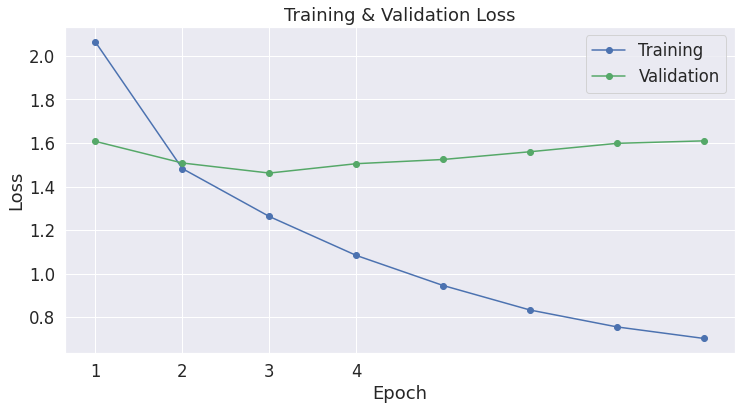

In [114]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

In [115]:
# Create sentence and label lists
sentences = test_df.text.values
labels = test_df.category.values

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = MAX_LEN,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Set the batch size.  
batch_size = 32  

# Create the DataLoader.
prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2329: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [116]:
# Prediction on test set
print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
  
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
  
    # Telling the model not to compute or store gradients, saving memory and 
    # speeding up prediction
    with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

    logits = outputs[0]

    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()
  
    # Store predictions and true labels
    predictions.append(logits)
    true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 10,312 test sentences...
    DONE.


In [117]:
from functools import reduce
scores = reduce(lambda x,y: x+y,[list(map(np.argmax,p)) for p in predictions])
labels = reduce(lambda x,y: list(x) + list(y), true_labels)

from sklearn.metrics import accuracy_score
accuracy_score(scores, labels)

0.5319045771916214

In [119]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(16, 12))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

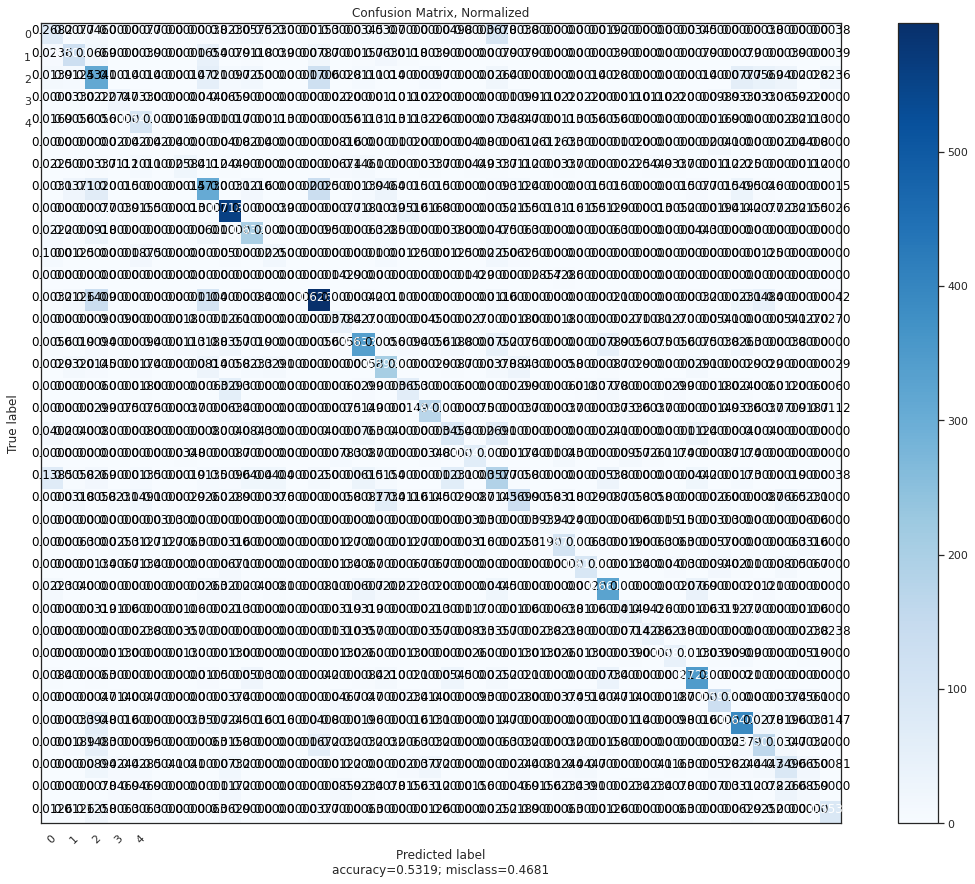

In [120]:
from sklearn.metrics import confusion_matrix

sns.set(font_scale=1)
sns.set(style='white')


cm = confusion_matrix(labels,scores)
plot_confusion_matrix(cm           = cm, 
                      normalize    = True,
                      target_names = ['0', '1', '2','3','4'],
                      title        = "Confusion Matrix, Normalized")